<a href="https://colab.research.google.com/github/Inteli-College/2024-2A-T05-CC09-G04/blob/main/image_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

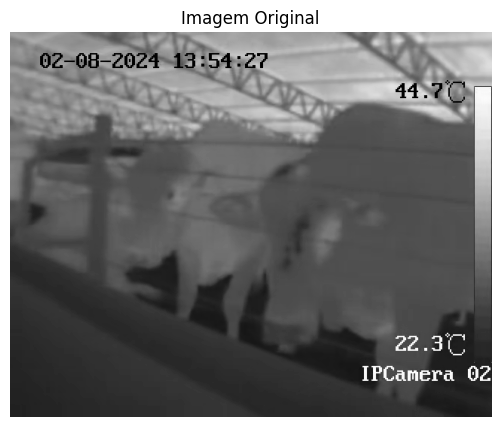

In [ ]:
# Seção 1: Carregamento e Visualização da Imagem Original

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import Image, ImageEnhance

# Carregando a imagem em escala de cinza usando OpenCV
image_path = "/content/frame_0189.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Exibindo a imagem original
plt.figure(figsize=(10, 5))
plt.title("Imagem Original")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


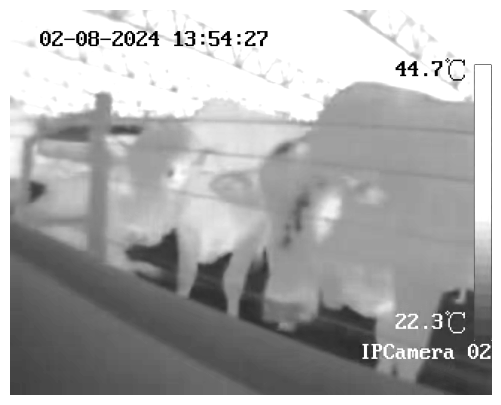

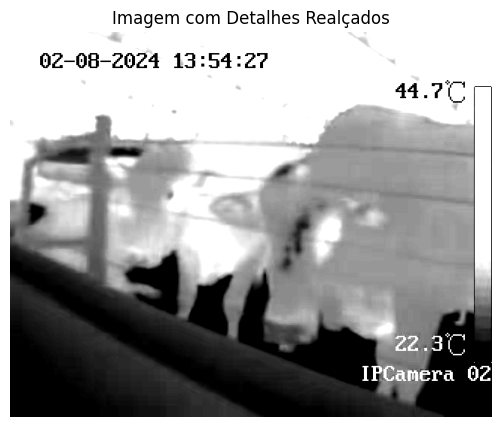

In [ ]:
# Seção 2: Aumento de Contraste e Realce de Detalhes

# Aumentando o contraste usando OpenCV
alpha = 2.0  # Contraste
beta = 0     # Brilho
contrasted_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Exibindo a imagem com aumento de contraste
plt.figure(figsize=(10, 5))
plt.imshow(contrasted_image, cmap='gray')
plt.axis('off')
plt.show()

# Realçando os detalhes usando PIL
pil_image = Image.fromarray(contrasted_image)
enhancer = ImageEnhance.Contrast(pil_image)
enhanced_image = enhancer.enhance(2.0)

# Convertendo de volta para numpy para visualização com Matplotlib
enhanced_image_np = np.array(enhanced_image)

# Exibindo a imagem com detalhes realçados
plt.figure(figsize=(10, 5))
plt.title("Imagem com Detalhes Realçados")
plt.imshow(enhanced_image_np, cmap='gray')
plt.axis('off')
plt.show()


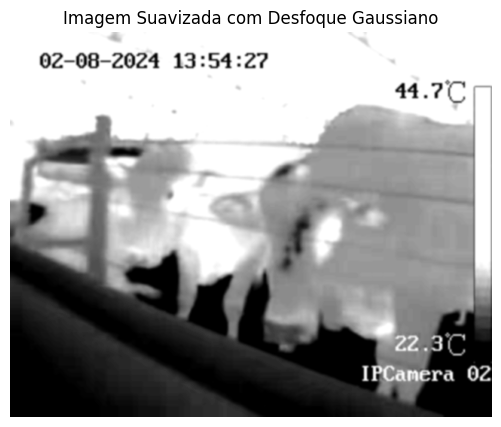

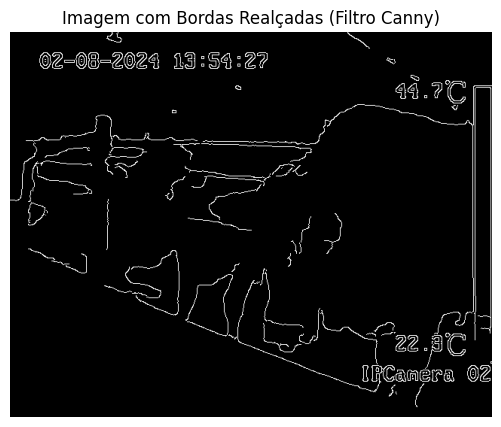

In [ ]:
# Seção 3: Aplicação de Filtros para Suavização e Realce de Bordas

# Aplicando filtro de desfoque gaussiano para suavizar a imagem
blurred_image = cv2.GaussianBlur(enhanced_image_np, (5, 5), 0)

# Exibindo a imagem suavizada
plt.figure(figsize=(10, 5))
plt.title("Imagem Suavizada com Desfoque Gaussiano")
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.show()

# Aplicando filtro de Canny para realce de bordas
edges_image = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Exibindo a imagem com bordas realçadas
plt.figure(figsize=(10, 5))
plt.title("Imagem com Bordas Realçadas (Filtro Canny)")
plt.imshow(edges_image, cmap='gray')
plt.axis('off')
plt.show()


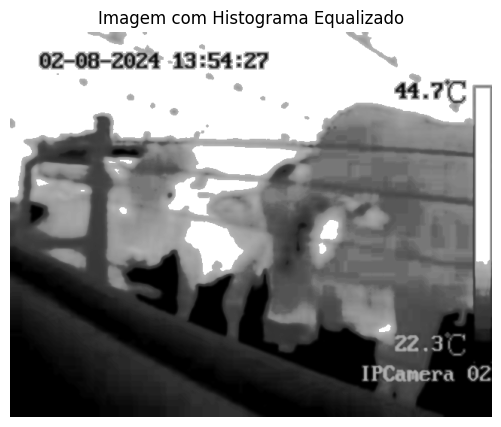

In [ ]:
# Seção 4: Equalização do Histograma

# Equalizando o histograma da imagem suavizada
equalized_image = cv2.equalizeHist(blurred_image)

# Exibindo a imagem com histograma equalizado
plt.figure(figsize=(10, 5))
plt.title("Imagem com Histograma Equalizado")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.show()


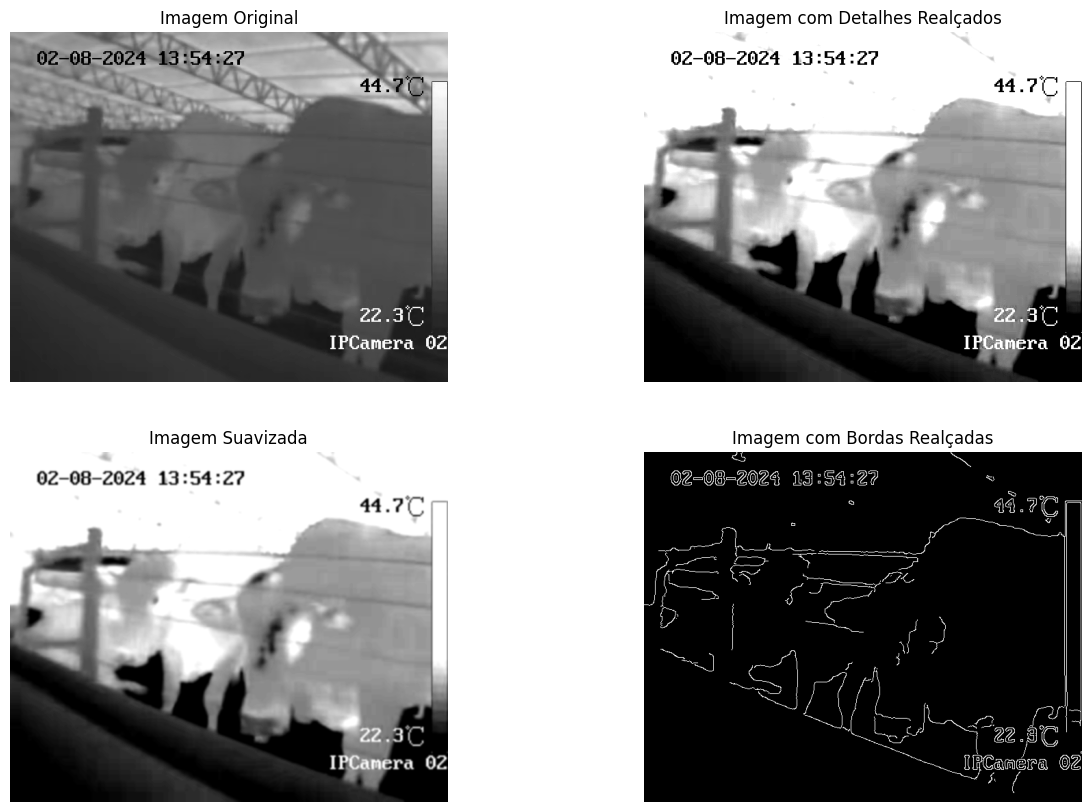

In [ ]:
# Seção 5: Comparação e Análise dos Resultados

# Comparando as imagens lado a lado
plt.figure(figsize=(15, 10))

# Imagem original
plt.subplot(2, 2, 1)
plt.title("Imagem Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Imagem com detalhes realçados
plt.subplot(2, 2, 2)
plt.title("Imagem com Detalhes Realçados")
plt.imshow(enhanced_image_np, cmap='gray')
plt.axis('off')

# Imagem suavizada com desfoque
plt.subplot(2, 2, 3)
plt.title("Imagem Suavizada")
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

# Imagem com bordas realçadas
plt.subplot(2, 2, 4)
plt.title("Imagem com Bordas Realçadas")
plt.imshow(edges_image, cmap='gray')
plt.axis('off')

plt.show()


In [ ]:
# Seção 6: Salvamento das Imagens Processadas

# Salvando a imagem final processada
final_image_path = "/content/final_processed_image.png"
cv2.imwrite(final_image_path, equalized_image)

print(f"A imagem processada foi salva em: {final_image_path}")


A imagem processada foi salva em: /content/final_processed_image.png


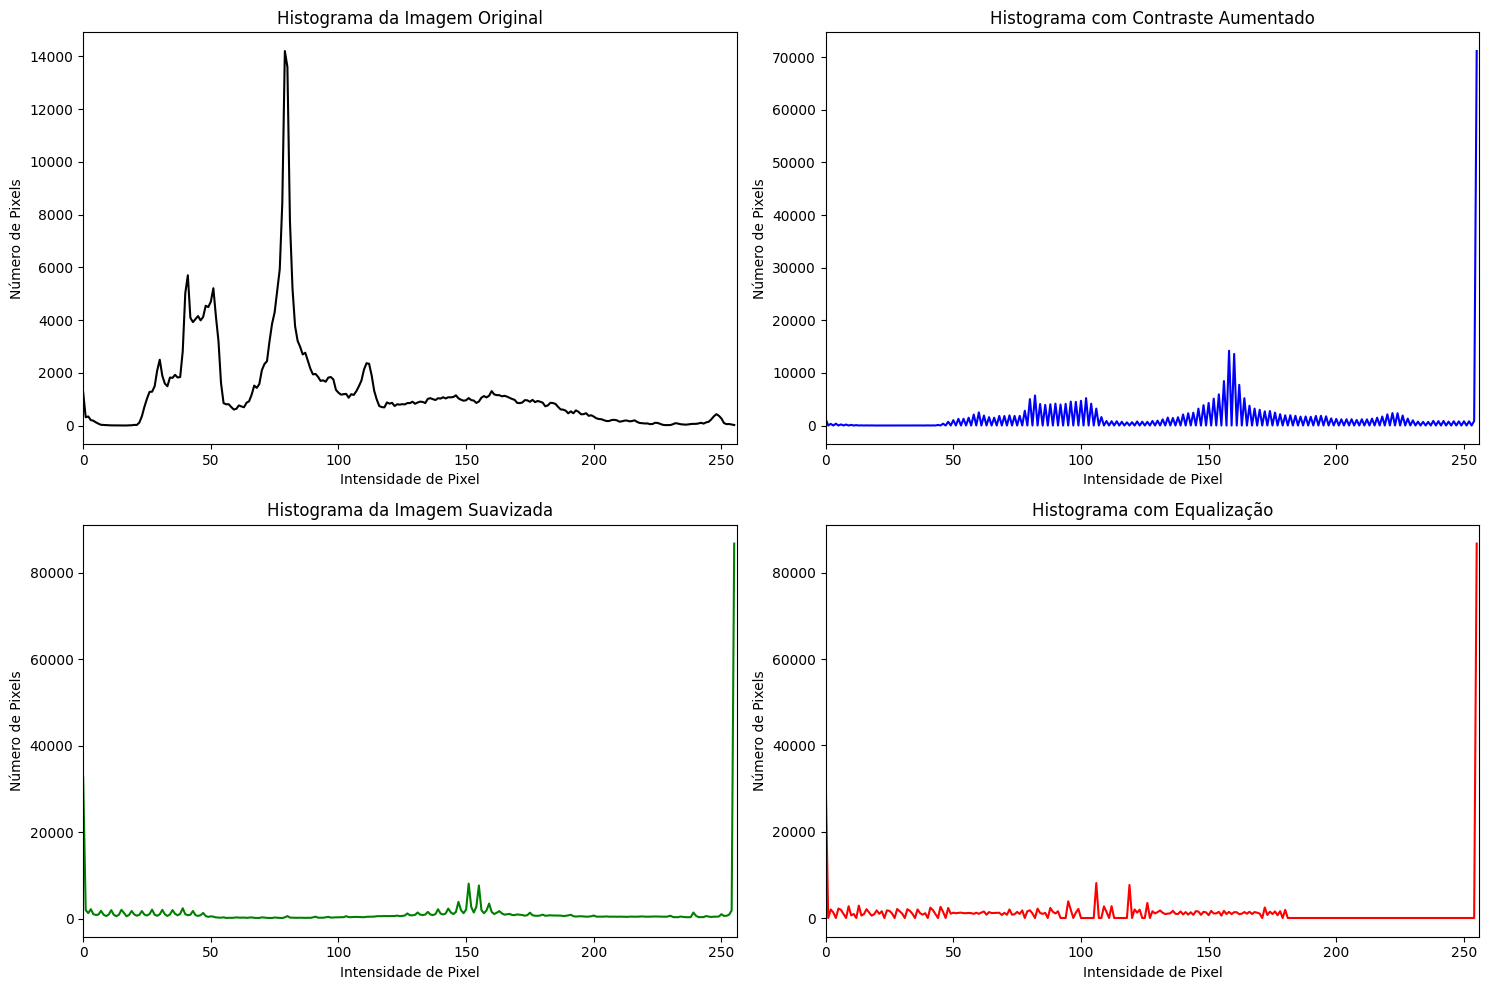

In [ ]:
# Seção 7: Cálculo e Exibição dos Histogramas de Intensidade

# Função para calcular e exibir o histograma de uma imagem
def plot_histogram(image, title, color):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel("Intensidade de Pixel")
    plt.ylabel("Número de Pixels")

# Exibindo histogramas para cada versão da imagem
plt.figure(figsize=(15, 10))

# Histograma da imagem original
plt.subplot(2, 2, 1)
plot_histogram(image, "Histograma da Imagem Original", 'black')

# Histograma da imagem com contraste aumentado
plt.subplot(2, 2, 2)
plot_histogram(contrasted_image, "Histograma com Contraste Aumentado", 'blue')

# Histograma da imagem suavizada
plt.subplot(2, 2, 3)
plot_histogram(blurred_image, "Histograma da Imagem Suavizada", 'green')

# Histograma da imagem com histograma equalizado
plt.subplot(2, 2, 4)
plot_histogram(equalized_image, "Histograma com Equalização", 'red')

plt.tight_layout()
plt.show()


1. **Imagem Original:** A maior parte dos pixels está concentrada em regiões escuras, com alguns picos em intensidades específicas, sugerindo áreas com pouca variação.

2. **Contraste Aumentado:** O aumento de contraste espalhou as intensidades para os extremos, tornando as áreas escuras mais escuras e as claras mais claras, com picos acentuados nos valores mínimos e máximos.

3. **Imagem Suavizada:** O filtro de desfoque suavizou a imagem, resultando em menos variação de intensidade, com a maioria dos pixels concentrados em uma faixa estreita e mais clara.

4. **Equalização:** A equalização redistribuiu as intensidades, mas ainda há uma grande concentração de pixels em altas intensidades, mostrando que a imagem continua com regiões dominantes claras.

